## Michael Madden, Feb 2021
Simple Python routine to read and plot a small dataset.

In [10]:
# Package imports
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import pandas as pd
import numpy as np

# Display plots inline and change default figure size
%matplotlib inline

In [11]:
# Use pandas to read the CSV file as a dataframe
df = pd.read_csv("moons400.csv")
df.head()
# The y values are those labelled 'Class': extract their values
# y = df['Class'].values

# # The x values are all other columns
# del df['Class']   # drop the 'Class' column from the dataframe
# X = df.values     # convert the remaining columns to a numpy array


,X0,X1,Class
0,2.071069,0.411529,1
1,-0.335398,1.032266,0
2,1.256631,-0.363937,1
3,1.269361,-0.379086,1
4,-0.839940,0.203669,0


In [7]:
# Some examples of working with the data, to look at rows/columns
print ("len(X):", len(X))            # outer array: one per sample
print ("len(X[0]):", len(X[0]))      # each inner array is the attributes of one sample
print ("len(X[:,0]):", len(X[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X)
print ("X: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y)", len(y))
print ("np.shape(y):", np.shape(y))

# You can transpose the y data using 'reshape'
yt = np.reshape(y, (len(y),1))  
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X): 400
len(X[0]): 2
len(X[:,0]): 400
X: nsamples = 400 , nattribs = 2
len(y) 400
np.shape(y): (400,)
np.shape(yt): (400, 1)
y transpose: nsamples = 400 , nattribs = 1


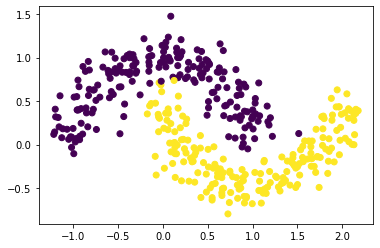

In [8]:
# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X[:,0], X[:,1], c=y)  

In [12]:
# CT4101 - ML Assignment 2
# Student Name(s): Tapan Auti, Atharva Kulkarni
# Student ID(s): 20231499, 20231773

import pandas as pd
import numpy as np

# 1 Author: Atharva
# Sigmoid Function Definition


def f(z):
    return 1 / (1 + np.exp(-z))


# 1 Author: Tapan
# Calculate loss function
def loss_gradient(w, x, b):
    z = np.dot(x, w)
    y = f(z)
    loss = (-b * np.log(y) - (1 - b) * np.log(1 - y)).mean()
    gdn = np.dot(x.T, (b - y)) / b.size

    # 1 Author: Atharva
    # Normalising Gradient Descent
    grad = gdn + 300 / (2 * b.size) * np.concatenate(([0], w[1:])).T
    return loss, grad


# 1 Author: Tapan
# Training Function
def model_fit(x, b, total_iterations=5000):
    final_w = []
    label = np.unique(b)
    all_loss = np.zeros(total_iterations)

    for c in label:
        b = np.where(b == c, 1, 0)
        w = np.zeros(x.shape[1])
        for i in range(total_iterations):
            all_loss[i], grad = loss_gradient(w, x, b)
            w += 0.01 * grad
        final_w.append(w)
    return final_w, label, all_loss


# 1 Author: Atharva
# Predict Function
def predict_prob(label, w, x):
    preds = [np.argmax([f(i@j) for j in final_w]) for i in x]
    return [label[p] for p in preds]


# 1 Author: Atharva
# Calculate Accuracb of the model
def accuracy(label, w, x, b):
    acc = predict_prob(label, w, x)
    return (acc == b).mean()


    # 2 Authors: Tapan, Atharva
# Pre processing data set beer.txt
df = pd.read_csv("moons400.csv")

# 2 Authors: Tapan, Atharva



data = np.array(df)

num_train = int(.70 * len(data))
num_test = int(0.15 * len(data))

x_train, y_train = data[:num_train, :-1], data[:num_train, -1]
x_test, y_test = data[num_test:, :-1], data[num_test:, -1]
final_w, label, losses = model_fit(x_train, y_train)
print(f"Test Accuracy  : {accuracy(label, final_w, x_test, y_test):.6f}")
print(final_w)


<ipython-input-12-691a059e57ba>:21: RuntimeWarning: divide by zero encountered in log
  loss = (-b * np.log(y) - (1 - b) * np.log(1 - y)).mean()
<ipython-input-12-691a059e57ba>:21: RuntimeWarning: invalid value encountered in multiply
  loss = (-b * np.log(y) - (1 - b) * np.log(1 - y)).mean()
<ipython-input-12-691a059e57ba>:13: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))
Test Accuracy  : 0.514706
[array([-8.71157879e+00,  9.88565019e+10]), array([-8.71157879e+00,  9.88565019e+10])]
